Task : To predict the genre of a movie based on its plot summary or other textual information. 

# MOVIE GENRE CLASSIFICATION

In [12]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,ConfusionMatrixDisplay,recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV,cross_val_score

In [2]:
#First we make columns name as per our description text file that will be update on train data and test data
train_columns = "ID ::: TITLE ::: GENRE ::: DESCRIPTION"
train_columns = train_columns.split(" ::: ")
test_columns = "ID ::: TITLE ::: DESCRIPTION"
test_columns = test_columns.split(" ::: ")
print(train_columns)
print(test_columns)

['ID', 'TITLE', 'GENRE', 'DESCRIPTION']
['ID', 'TITLE', 'DESCRIPTION']


In [3]:
#read the train data 
train_data = pd.read_csv(r'E:\DATA-SCIENCE\Project\CODSOFT\archive\Genre Classification Dataset\train_data.txt',sep=" ::: ",
                        header=None,names=train_columns,usecols=[0,1,2,3],engine='python')

In [4]:
#read the test data
test_data = pd.read_csv(r'E:\DATA-SCIENCE\Project\CODSOFT\archive\Genre Classification Dataset\test_data.txt',sep=" ::: ",
                        header=None,names=test_columns,usecols=[0,1,2],engine='python')

In [5]:
train_data.head() #Great, here we can see the dataframe of train data 

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [6]:
test_data.head()

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),Before he was known internationally as a marti...


In [7]:
#Data cleaning Process 
#Finding the Missing value in dataframe 
train_data.isna().sum() # No Missing value found 

ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [8]:
train_data.shape  #54214 raws with 4 features column 

(54214, 4)

In [9]:
test_data.shape   #54200 raws with 3 features column

(54200, 3)

In [10]:
type(train_data['GENRE'])

pandas.core.series.Series

In [11]:
print(set(train_data['GENRE'])) #finding the unique genre lable 
print(f"Total count of genre : {len(set(train_data['GENRE']))}")

{'western', 'documentary', 'horror', 'mystery', 'biography', 'history', 'reality-tv', 'adventure', 'sport', 'thriller', 'musical', 'music', 'sci-fi', 'drama', 'adult', 'war', 'comedy', 'romance', 'game-show', 'family', 'crime', 'action', 'news', 'talk-show', 'fantasy', 'animation', 'short'}
Total count of genre : 27


In [12]:
unique = collections.Counter(train_data['GENRE'])
print(unique)           #count the total numbers of genre present in dataset 

Counter({'drama': 13613, 'documentary': 13096, 'comedy': 7447, 'short': 5073, 'horror': 2204, 'thriller': 1591, 'action': 1315, 'western': 1032, 'reality-tv': 884, 'family': 784, 'adventure': 775, 'music': 731, 'romance': 672, 'sci-fi': 647, 'adult': 590, 'crime': 505, 'animation': 498, 'sport': 432, 'talk-show': 391, 'fantasy': 323, 'mystery': 319, 'musical': 277, 'biography': 265, 'history': 243, 'game-show': 194, 'news': 181, 'war': 132})


In [13]:
print(train_data['GENRE'].value_counts())

GENRE
drama          13613
documentary    13096
comedy          7447
short           5073
horror          2204
thriller        1591
action          1315
western         1032
reality-tv       884
family           784
adventure        775
music            731
romance          672
sci-fi           647
adult            590
crime            505
animation        498
sport            432
talk-show        391
fantasy          323
mystery          319
musical          277
biography        265
history          243
game-show        194
news             181
war              132
Name: count, dtype: int64


In [14]:
train_data.columns

Index(['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], dtype='object')

**Model Development for text data**

here we use TfidfVectorizer library which is combination of Term Frequency and Inverse Document Frequency.
tf shows us how many time the term(word) are repeated in string, and idf that will count the weight(importance) of that word from document.



In [5]:
#Selection of Dependent and independent variable of Train Data
X = train_data.loc[:,'DESCRIPTION']
y = train_data.loc[:,'GENRE']
y = y.values 

In [6]:
#test data
X_test = test_data.loc[:,'DESCRIPTION']

In [7]:
#Vector model for train data and test data
vector_model = TfidfVectorizer(min_df=1,stop_words="english",analyzer="word",lowercase=True)
vector_train_data = vector_model.fit_transform(X)   #transform the train data
vector_test_data = vector_model.transform(X_test)

In [18]:
print(vector_train_data)

  (0, 13413)	0.1303132428647294
  (0, 80237)	0.1821079708460167
  (0, 104711)	0.14745244623799802
  (0, 19998)	0.1090134458123681
  (0, 9219)	0.19107204420021867
  (0, 33201)	0.19920174966015627
  (0, 24051)	0.19284163839884727
  (0, 83109)	0.12784279167808804
  (0, 40532)	0.07894399415477685
  (0, 22429)	0.10391455554534515
  (0, 63656)	0.068230845346714
  (0, 62369)	0.05396455493266389
  (0, 4418)	0.1364925834937789
  (0, 19433)	0.152326698049878
  (0, 117756)	0.16042367496919674
  (0, 51026)	0.13737408730952422
  (0, 118311)	0.18100233420912473
  (0, 84637)	0.11701194539669875
  (0, 36282)	0.11234882358846689
  (0, 37137)	0.18514123041122094
  (0, 112992)	0.11953772762734183
  (0, 6443)	0.1456374274802404
  (0, 20438)	0.13020460321048605
  (0, 101751)	0.18100233420912473
  (0, 49499)	0.11651047209220508
  :	:
  (54213, 88166)	0.18118465962883884
  (54213, 658)	0.1815792497751359
  (54213, 28124)	0.17147983980314732
  (54213, 117563)	0.19307142214579276
  (54213, 39209)	0.18066713789

**Model Development for Classification**

In [18]:
#Let use Logistic Regression 
Log_model = LogisticRegression(solver='saga',max_iter=200).fit(vector_train_data,y)

In [19]:
#Now we predict on train data
pred_train_data = Log_model.predict(vector_train_data)
print(pred_train_data)
print("Accuracy of Logistic Model on Train data = {:.2f}".format(Log_model.score(vector_train_data,y)*100))

['drama' 'thriller' 'comedy' ... 'comedy' 'comedy' 'documentary']
Accuracy of Logistic Model on Train data = 72.01


In [20]:
#Now predict on test data 
pred_test_data = Log_model.predict(vector_test_data)
print(pred_test_data)

['drama' 'drama' 'documentary' ... 'drama' 'drama' 'documentary']


In [8]:
#For checking the accuracy on test data we read the another file 
test_result_column = "ID ::: TITLE ::: GENRE ::: DESCRIPTION"
test_result_column = test_result_column.split(" ::: ")
test_result_column

test_result_data = pd.read_csv(r'E:\DATA-SCIENCE\Project\CODSOFT\archive\Genre Classification Dataset\test_data_solution.txt',
                        sep=' ::: ',header=None,names=test_result_column,index_col=[0,1,2,3],engine='python')

In [22]:
test_result_data.head()

,,,
ID,TITLE,GENRE,DESCRIPTION
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apartment, his job, but especially his girlfriend, Vespa. One day while showering, Vespa runs out of shampoo. L.R. runs across the street to a convenience store to buy some more, a quick trip of no more than a few minutes. When he returns, Vespa is gone and every trace of her existence has been wiped out. L.R.'s life becomes a tortured existence as one strange event after another occurs to confirm in his mind that a conspiracy is working against his finding Vespa."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty child of three belonging to a wealthy middle-class family. Since Cristina's birth, he feels he has lost the privileged position of ""prince"" of the house for his eight months old sister. So, with his brother Juan, who is eight years old and is quite disobedient, spend their time committing prank after prank, causing the resulting anger of his mother, the nanny and the old housemaid. The rest of the family members are two much older brothers, his resigned mother and a retrograde father of authoritarian ideas. But many years have passed, and the civil war that won the despot Don Pablo is simply for their children ""Dad's war""."
3,Off the Beaten Track (2010),documentary,"One year in the life of Albin and his family of shepherds in the North of Transylvania. In direct cinema style, this documentary follows their day to day routines, and their struggle to adapt to a new world where traditions are gradually replaced by modern values. Since joining the EU, Romania has been facing, like several other Eastern European countries, the pressure of modern values, introducing in farmer's lives the cruel notion of competition, the temptation of migrating to the higher salaries abroad, and the marginalization of locally produced food against industrial products."
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with his brother for about 10 years and has a serious cancer. Diego is a talented film director with difficulty to deal with his sickness, which is making him lose his friends and family. His best friend and doctor Ricardo gives him the news that he needs a bone marrow transplantation, otherwise he'll die. He gets married to a beautiful woman, Livia, just before going to Seattle to get treatment. There, he undergoes numerous medical procedures. During treatment, he meets an Hindu boy, with whom he plays and whom he tells amazing stories. Odds are against him and when stakes are the highest, Diego gets a visit from a very uncommon man."
5,Er nu zhai (1955),drama,"Before he was known internationally as a martial arts superstar, Bruce Lee had appeared in a handful of Hong Kong films as a child star in the 1940s/50s. One of these early films was The More the Merrier (1955), a.k.a. We Owe it to Our Children from the Union Film Enterprise, a family melodrama written and directed by renowned filmmaker Chin Chien (My Intimate Partners). Featuring the 14-year-old Bruce Lee and future Cantonese Opera star Yuen Siu Fai, the B&W film revolves around accountant Ming (played by Cheung Wood Yau) and his wife (Tsi Lo Lin) who suffers a miscarriage in an car accident. The couple decides to adopt a baby girl, not knowing that she's the daughter given up by Ming's poor co-worker who struggles to feed a bunch of kids. Bruce Lee plays the slacker son of the landlord (Ko Lo Chuen)."


In [9]:
test_result_data = test_result_data.reset_index()

In [10]:
#Select the genre column 
test_result_genre = test_result_data['GENRE']

In [25]:
test_result_genre

0           thriller
1             comedy
2        documentary
3              drama
4              drama
            ...     
54195         horror
54196        western
54197          adult
54198          drama
54199          drama
Name: GENRE, Length: 54200, dtype: object

In [26]:
#Accuracy for test data 
#[pred_test_data] use this variable which is prediction on test input data 
accuray_logistic = accuracy_score(test_result_genre,pred_test_data)
print("Accuracy on test data : {:.2f} ".format((accuray_logistic)*100))

Accuracy on test data : 58.82 


In [27]:
#Let we check first 10 raws of actual and predicted data 
test_10_raws = pd.DataFrame(test_result_genre.loc[:10])
test_10_pred_raws = pd.DataFrame(pred_test_data[:10])
merge_df = pd.merge(test_10_raws,test_10_pred_raws,left_index=True,right_index=True)
merge_df

,GENRE,0
0,thriller,drama
1,comedy,drama
2,documentary,documentary
3,drama,drama
4,drama,drama
5,horror,drama
6,drama,drama
7,comedy,comedy
8,documentary,documentary
9,drama,drama


In [28]:
#Confusion Matrix 
cf = confusion_matrix(test_result_genre,pred_test_data)
print(cf)
precision = precision_score(test_result_genre,pred_test_data,average='macro',zero_division=0)
print("Precision Score : {:.2f}".format((precision)*100))
recall = recall_score(test_result_genre,pred_test_data,average='macro',zero_division=0)
print("Recall Score : {:.2f}".format((recall)*100))

"""For precision score :  
This means that out of all instances that our model predicted as positive, approximately 61.47% were actually positive.
Higher precision indicates that the model is good at avoiding false positives 
(predicting an instance as positive when it's actually negative)."""
"""For Recall Score (sensitivity score)
This means that out of all actual positive instances, our model correctly predicted approximately 23.40% as positive.
Lower recall indicates that the model is missing a significant number of actual positive instances (false negatives).
"""

[[  340     2     5     0     0   130     3   165   536     1     0     0
      0    41     0     0     0     0     2     0    15    36     8     0
     25     0     5]
 [    4   121    15     0     0   197     0    53   153     0     0     0
      0     4     1     0     0     0     1     1     1    37     1     0
      1     0     0]
 [   33    35   111     2     0   112     0   149   241     5     1     0
      0    27     0     0     0     0     4     0     8    32     1     0
      9     0     5]
 [   25     0     5    12     0   137     0    93   116     9     1     0
      0    20     2     0     0     0     1     0    17    59     0     0
      1     0     0]
 [    0     0     0     0     0    12     0   175    65     0     0     0
      0     1     1     0     0     0     0     0     0    10     0     0
      0     0     0]
 [   45     5     0     1     0  4376     2   444  2257     8     0     1
      0    65    10     0     0     0    13     1     8   186     0     3
     10

'For Recall Score (sensitivity score)\nThis means that out of all actual positive instances, our model correctly predicted approximately 23.40% as positive.\nLower recall indicates that the model is missing a significant number of actual positive instances (false negatives).\n'

**Ploting Confusion matrix for LOGISTIC REG**

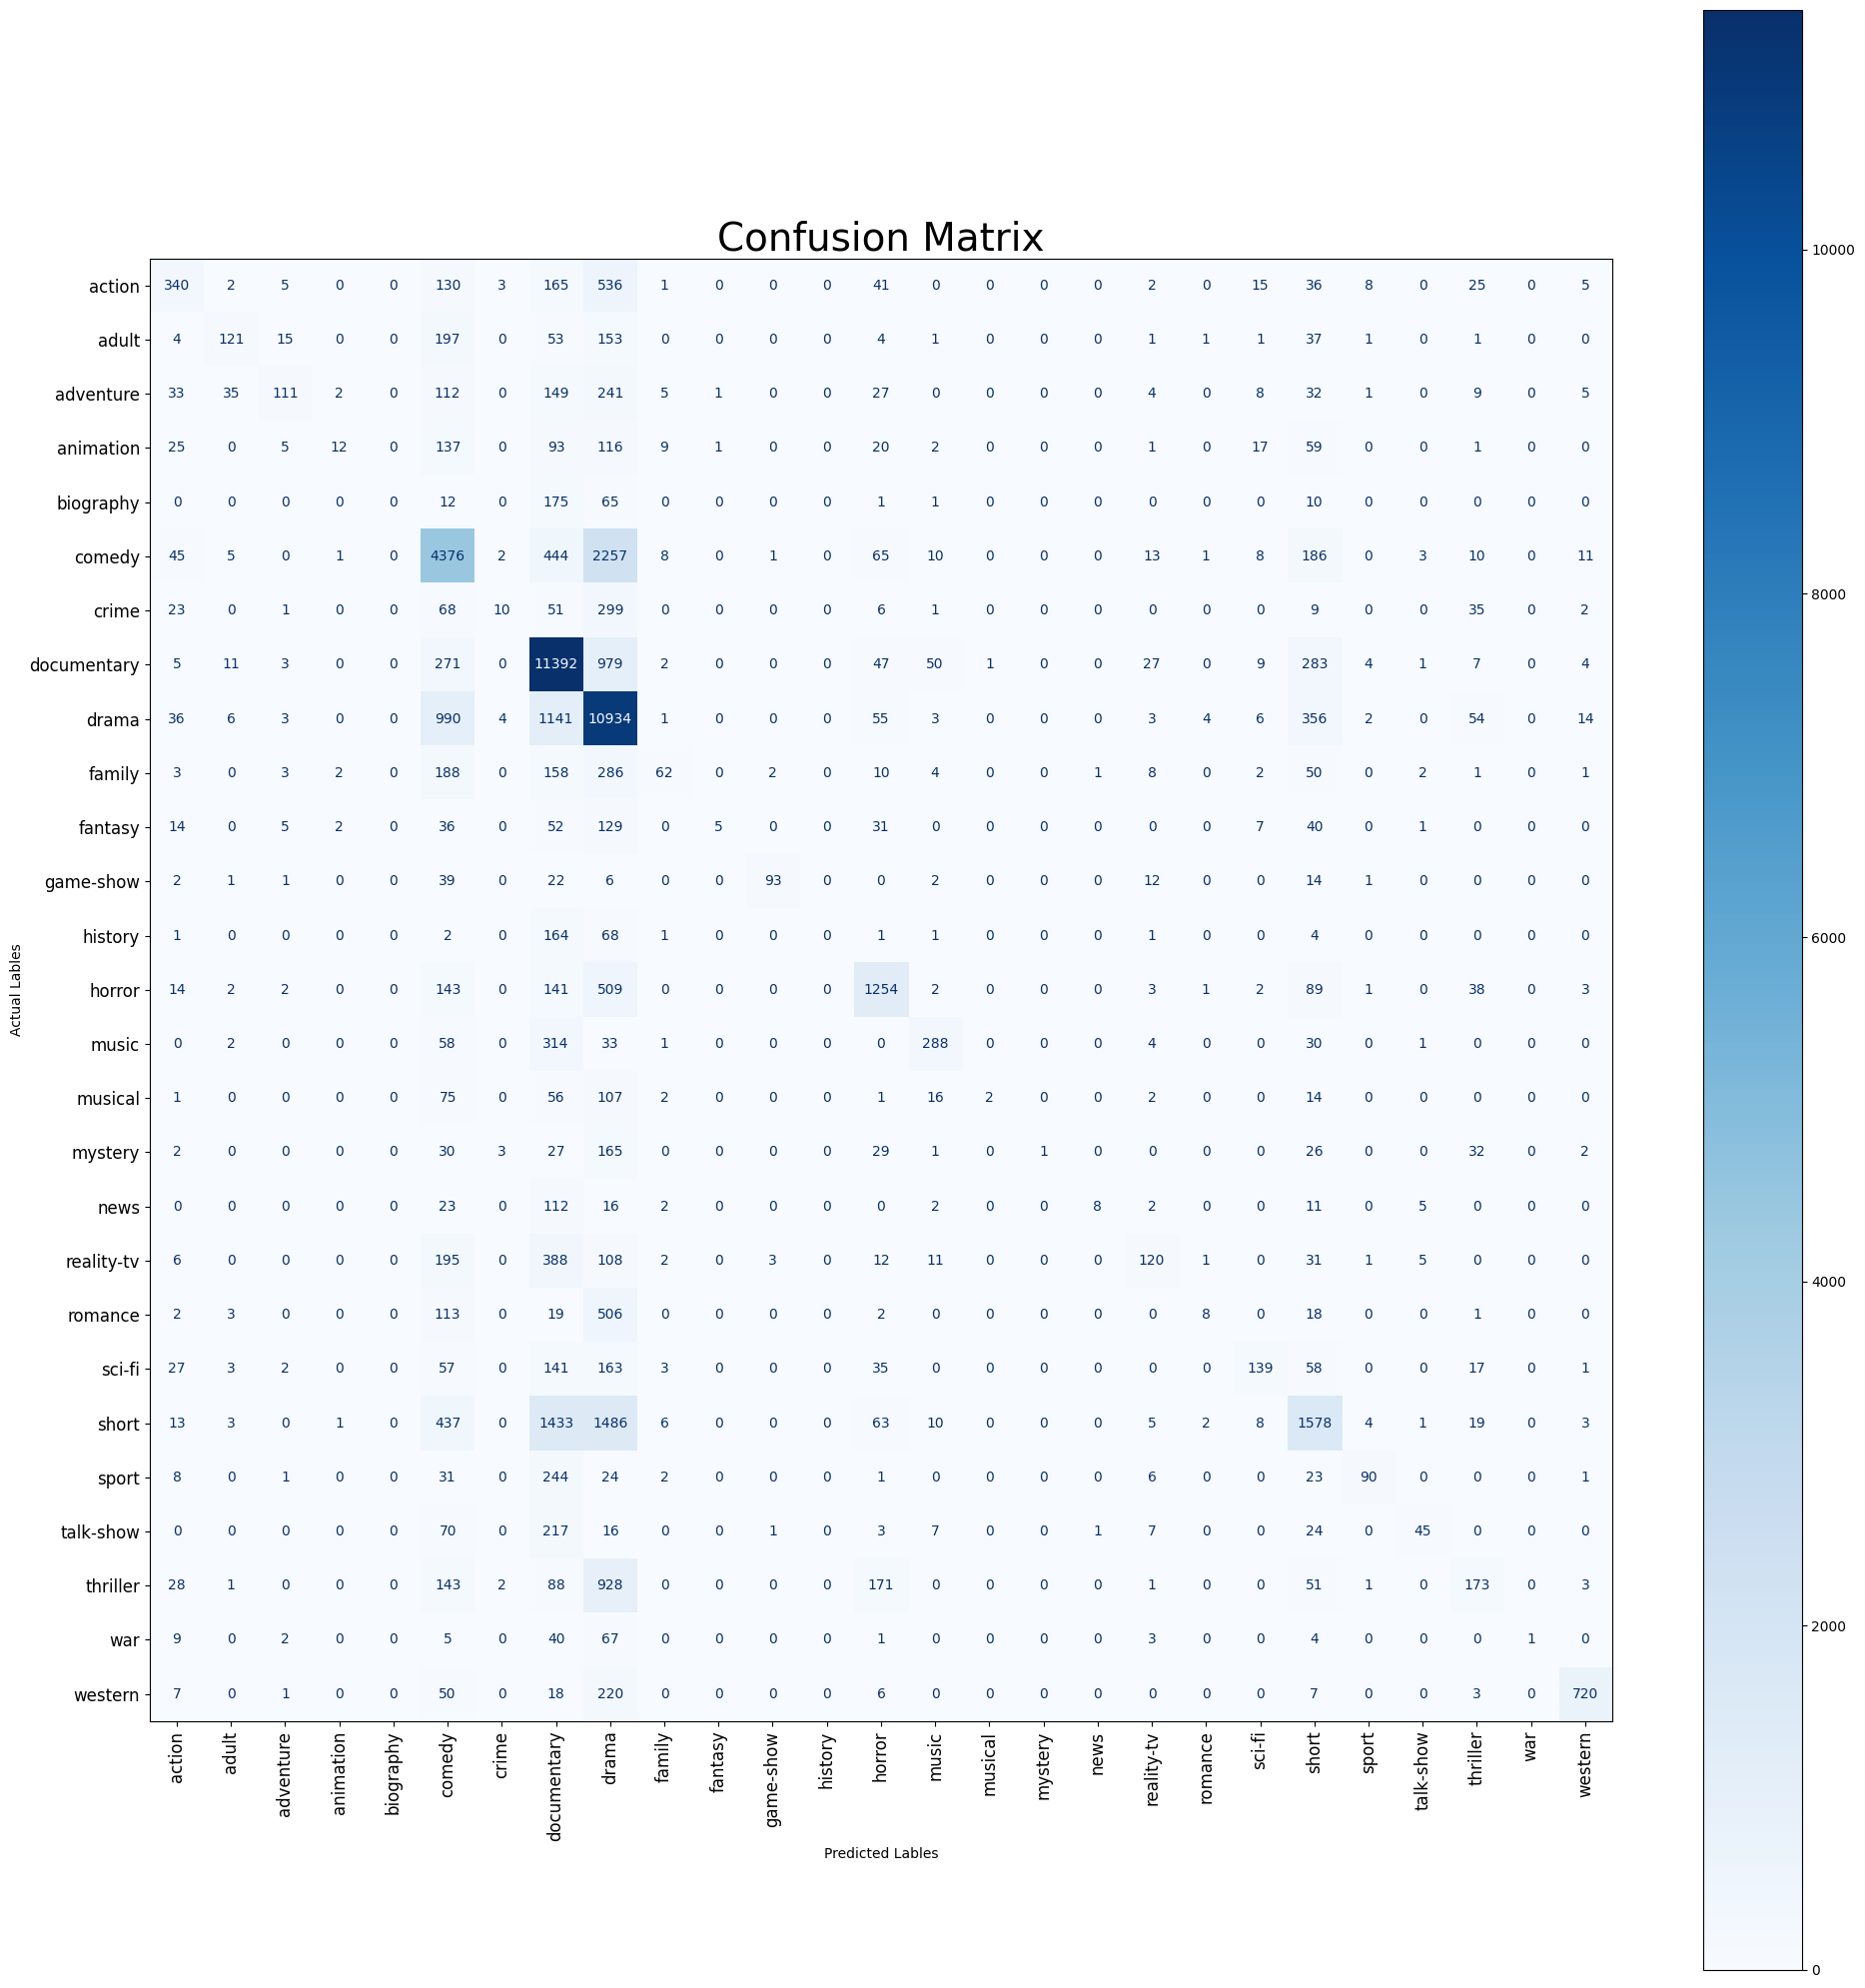

In [29]:

cmd = ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=np.unique(test_result_genre))
plt.figure(figsize=(20, 20))
cmd.plot(cmap=plt.cm.Blues,ax=plt.gca(),xticks_rotation=45)
plt.title("Confusion Matrix",fontsize=28)
plt.xlabel("Predicted Lables")
plt.ylabel("Actual Lables")
plt.xticks(rotation=90,fontsize=12)  
plt.yticks(fontsize=12)  
plt.tight_layout()
plt.show()

**Feature Scalling**

In [11]:
#let we scale the data 
scaler = StandardScaler(with_mean=False)
scale_train_data = scaler.fit_transform(vector_train_data)
scale_test_data = scaler.transform(vector_test_data)

**Made another model with scaling data**

In [37]:
#Taking long time to execute
Log_model2 = LogisticRegression(solver='saga',max_iter=500).fit(scale_train_data,y)

C:\Users\Tejas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [38]:
pred_train_data2 = Log_model2.predict(scale_train_data)
print(pred_train_data2)
print("Accuracy of Logistic Model on Train data = {:.2f}".format(Log_model2.score(scale_train_data,y)*100))
pred_test_data2 = Log_model2.predict(scale_test_data)
print(pred_test_data2)

#Accuracy on test data 
accuray_logistic2 = accuracy_score(test_result_genre,pred_test_data2)
print("Accuracy on test data : {:.2f} ".format((accuray_logistic2)*100))


['drama' 'thriller' 'adult' ... 'documentary' 'comedy' 'history']
Accuracy of Logistic Model on Train data = 96.59
['comedy' 'drama' 'documentary' ... 'drama' 'horror' 'short']
Accuracy on test data : 54.17 


In [39]:
test_10_raws2 = pd.DataFrame(test_result_genre.loc[:10])
test_10_pred_raws2 = pd.DataFrame(pred_test_data2[:10])
merge_df2 = pd.merge(test_10_raws2,test_10_pred_raws2,left_index=True,right_index=True)
merge_df2

,GENRE,0
0,thriller,comedy
1,comedy,drama
2,documentary,documentary
3,drama,drama
4,drama,drama
5,horror,drama
6,drama,drama
7,comedy,drama
8,documentary,documentary
9,drama,documentary


**Decision Tree**

In [40]:
decision_model = DecisionTreeClassifier(random_state=42)

In [41]:
decision_model.fit(vector_train_data,y)

DecisionTreeClassifier(random_state=42)

In [42]:
#Accuracy on train data
pred_train_data_decision = decision_model.predict(vector_train_data)
print(pred_train_data_decision)
print("Accuracy score on train data : {:.2f}".format(decision_model.score(vector_train_data,y)*100))
train_accuracy_score_decision = accuracy_score(y,pred_train_data_decision)*100
print("Accuracy on train data : {:.2f}".format(train_accuracy_score_decision))

['drama' 'thriller' 'adult' ... 'documentary' 'comedy' 'history']
Accuracy score on train data : 99.95
Accuracy on train data : 99.95


In [43]:
#Accuracy on test data
pred_test_data_decision = decision_model.predict(vector_test_data)
print(pred_test_data_decision)
test_accuracy_score_decision = accuracy_score(test_result_genre,pred_test_data_decision)*100
print("Accuracy on test data : {:.2f}".format(test_accuracy_score_decision))

['comedy' 'drama' 'documentary' ... 'thriller' 'drama' 'documentary']
Accuracy on test data : 37.05


In [13]:
#Label Encoding for target value on (train and test data)
label_encoder = LabelEncoder()
y_train_encode = label_encoder.fit_transform(y)
y_test_encode = label_encoder.transform(test_result_genre)

In [18]:
#As we see on the test data the result is not fine 
#let use the Extreme Gradient Boosting 
xgb_train = xgb.DMatrix(vector_train_data,y_train_encode,enable_categorical=True)   #convert the data into xgbBoost's DMatrix 
xgb_test = xgb.DMatrix(vector_test_data,y_test_encode,enable_categorical=True)

In [19]:
#creating model
num_classes=len(label_encoder.classes_)
n=50
params = {
    'objective': 'multi:softmax',
    'max_depth': 3,
    'num_class' : num_classes,
    'learning_rate': 0.1
}
xgb_model = xgb.train(params=params,dtrain=xgb_train,num_boost_round=n)

In [20]:
#prediction with xgb model 
pred_xgb = xgb_model.predict(xgb_test)

In [21]:
#inverse back the label encoder labels 
predicted_labels = label_encoder.inverse_transform(pred_xgb.astype(int))
print(predicted_labels)

['drama' 'drama' 'documentary' ... 'drama' 'drama' 'documentary']


In [22]:
#Accuracy check on xgb model
accuracy_xgb = accuracy_score(test_result_genre,predicted_labels)*100
print(f"Accuracy score on xgb: {accuracy_xgb:.2f}%")

Accuracy score on xgb: 47.34%


In [16]:
#Let's try another method for improving the xgb model 
#Use scale data and hyperparameter tuning
#Taking too much time for exucution that's why drop it
"""num_classes = len(label_encoder.classes_)
param_grid = {
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=num_classes)
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1)
grid_search.fit(scale_train_data, y_train_encode)"""


"num_classes = len(label_encoder.classes_)\nparam_grid = {\n    'max_depth': [3, 6, 9],\n    'min_child_weight': [1, 3, 5],\n    'subsample': [0.6, 0.8, 1.0],\n    'colsample_bytree': [0.6, 0.8, 1.0],\n    'learning_rate': [0.01, 0.1, 0.2],\n    'n_estimators': [100, 200, 300]\n}\nxgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=num_classes)\ngrid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1)\ngrid_search.fit(scale_train_data, y_train_encode)"

**Result** We got best accuracy score on logistic regression on test data 58.82% 

**Conclusion:** After extensive experimentation with different machine learning models and thorough feature scalling, the performance of three classifiers—Logistic Regression, Decision Tree, and XGBoost—on the task of movie genre classification was evaluated.In conclusion, while the current models provide a foundational understanding and reasonable accuracy